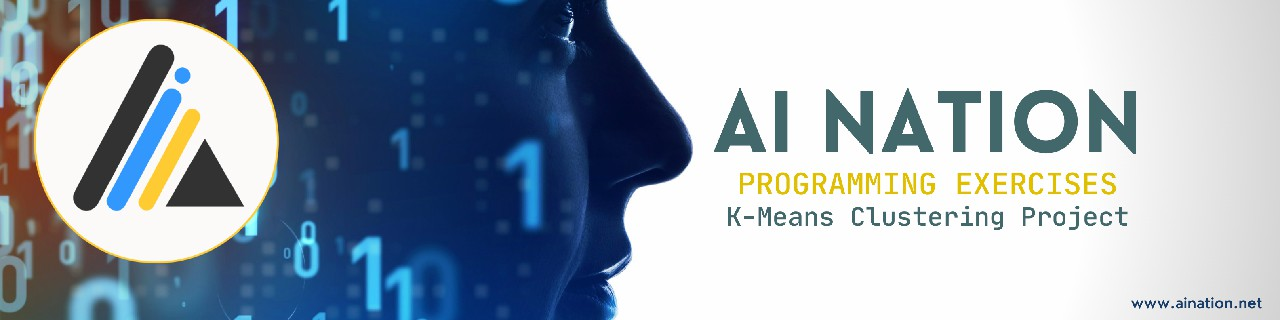

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import os
from PIL import Image
import cv2
import shutil

In [2]:
file_dir = ['fruits/Kiwi','fruits/Pear','fruits/Watermelon']
images = []
file_list = []

for cur_class in file_dir:
    
    for cur_file in os.listdir(cur_class):
        read_path = cur_class+"/"+cur_file
        img = cv2.imread(read_path)
        img = cv2.resize(img,(224,224))

        images.append(img)
        file_list.append(read_path)

images= np.array(images)
file_list = np.array(file_list)

In [3]:
print("Images shape: ",images.shape)
print("File list shape: ",file_list.shape)

Images shape:  (1401, 224, 224, 3)
File list shape:  (1401,)


## Feature Generate using pretrain model

In [4]:
model = tf.keras.applications.MobileNetV2(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
predictions = model.predict(images.reshape(-1, 224, 224, 3))
features = predictions.reshape(images.shape[0], -1)

44/44 [==============================] - 7s 27ms/step


In [5]:
print("Features shape", features.shape)

Features shape (1401, 62720)


# Silhouette Coefficient 
The Silhouette Coefficient is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample. The Silhouette Coefficient for a sample is (b - a) / max(a, b). To clarify, b is the distance between a sample and the nearest cluster that the sample is not a part of. Note that Silhouette Coefficient is only defined if number of labels is 2 <= n_labels <= n_samples - 1.

In [6]:
sil = []
kl = []
kmax = 10

for k in range(2, kmax+1):
    kmeans2 = KMeans(n_clusters = k).fit(features)
    labels = kmeans2.labels_
    sil.append(silhouette_score(features, labels, metric = 'euclidean'))
    kl.append(k)

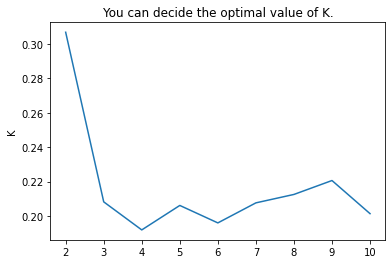

In [7]:
plt.plot(kl, sil)
plt.ylabel('Silhoutte Score')
plt.ylabel('K')
plt.title("You can decide the optimal value of K.")
plt.show()



## Train K-Means Clusting

In [17]:
#Train K-Means Clusting

k = 2
kmodel = KMeans(n_clusters=k, random_state=728)
kmodel.fit(features)


KMeans(n_clusters=2, random_state=728)

## Test Model

In [18]:
#Load test images
test_path = "fruits/testset"
test_images = []
test_files = []


for cur_file in os.listdir(test_path):
    read_path = test_path+"/"+cur_file
    img = cv2.imread(read_path)
    img = cv2.resize(img,(224,224))

    test_images.append(img)
    test_files.append(read_path)
    
test_images = np.array(test_images)
test_files = np.array(test_files)

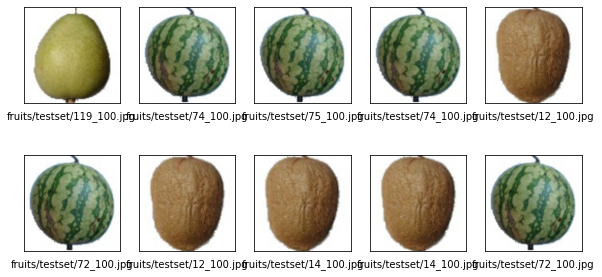

In [19]:
plt.figure(figsize=(10,5))
random_inds = np.random.choice(range(len(test_images)),10)

for i,img_i in enumerate(random_inds):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    show_image = cv2.cvtColor(test_images[img_i],cv2.COLOR_BGR2RGB)
    plt.imshow(np.squeeze(show_image))
    plt.xlabel(test_files[img_i])


In [20]:
print("test_images shape: ",test_images.shape)
print("test_files list shape: ",test_files.shape)

test_images shape:  (12, 224, 224, 3)
test_files list shape:  (12,)


In [21]:
#Generate features from test set
test_predictions = model.predict(test_images.reshape(-1, 224, 224, 3))
test_features = test_predictions.reshape(test_images.shape[0], -1)

1/1 [==============================] - 0s 22ms/step


In [22]:
# Cluter the the features
kpredictions = kmodel.predict(test_features)
kpredictions

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1])

In [24]:

kiwi_path ="result/Kiwi"
pear_path = "result/Pear"
watermelon_path = "result/Watermelon"
other_path ="result/others"


os.mkdir(kiwi_path)
os.mkdir(pear_path)
os.mkdir(watermelon_path)
os.mkdir(other_path)


FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'result/Kiwi'

In [25]:
import cv2
for i,img in enumerate(test_images):
 
    if kpredictions[i] == 1:
        cv2.imwrite(watermelon_path+"/"+str(i)+".jpg",img)
    elif kpredictions[i] == 2:
        cv2.imwrite(watermelon_path+"/"+str(i)+".jpg",img)
    elif kpredictions[i] == 3:
        cv2.imwrite (kiwi_path+"/"+str(i)+".jpg",img)
        
        
    elif kpredictions[i] == 0:
        cv2.imwrite (pear_path+"/"+str(i)+".jpg",img)